0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object
(4179,)
(1393,)


<AxesSubplot:>

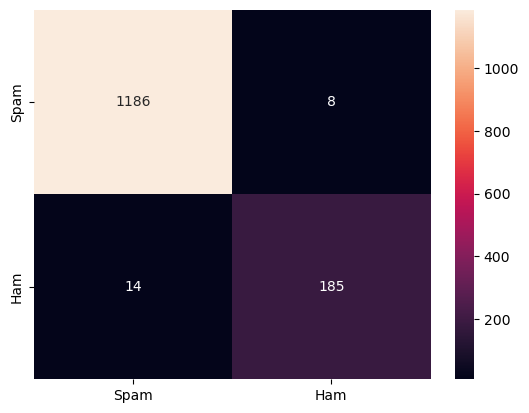

In [7]:
#import packages
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#import data
spam_df = pd.read_csv("mail_data.csv")
mail_data = spam_df.where((pd.notnull(spam_df)),'')
mail_data.head()
mail_data.shape
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1
X = mail_data['Message']
Y = mail_data['Category']
print(X)
print(Y)
#inspect data
spam_df.groupby('Category').describe()
#turn a spam\ham into numerical data, creating a new column called 'spam'
spam_df['spam']=spam_df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
spam_df
#create train\test split
x_train, x_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.spam)
print(x_train.shape)
print(x_test.shape)
x_train.describe()
cv=CountVectorizer()
x_train_count=cv.fit_transform(x_train.values)
x_train_count
x_train_count.toarray()
#train model
model=MultinomialNB()
model.fit(x_train_count, y_train)
#pre test ham
email_ham=["hey wanna meet up for the game?"]
email_ham_count=cv.transform(email_ham)
model.predict(email_ham_count)
#pre-test spam
email_spam=["reward money click"]
email_spam_count=cv.transform(email_spam)
model.predict(email_spam_count)
#test model
x_test_count=cv.transform(x_test)
model.score(x_test_count,y_test)
y_pred = model.predict(cv.transform(x_test))
con_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), ["Spam","Ham"], ["Spam","Ham"])
sn.heatmap(con_mat, annot=True, fmt="")